In [11]:
import numpy as np
from iminuit import Minuit
from iminuit.cost import LeastSquares
import matplotlib.pyplot as plt
import iminuit
print(iminuit.__version__)

2.30.1


In [12]:
data = np.loadtxt("./benchmark.dat", delimiter='\t', comments='#')
print(data.shape)
lattice_size = data[:, 0]
number_nodes = data[:, 1]
exec_time = data[:, 2]

(18, 3)


In [13]:
def model_quad(x, a, b, c):
    return a + b * x + c * x ** 2

def model(x, a, b):
    return a * x ** b

def model2(x, a):
    return a*x*np.log(x)

In [14]:
x = number_nodes
y = exec_time

# x = x[1:]
# y = y[1:]

cost = LeastSquares(x, y, np.ones_like(y), model_quad)
m = Minuit(cost, a=1e-5, b=2, c=2)
# m.limits['a'] = (None, None)
# m.limits['b'] = (2, 2)
m.migrad()


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 3.743e+08 (χ²/ndof = 24953347.6)│              Nfcn = 97               │
│ EDM = 1.87e-14 (Goal: 0.0002)    │            time = 0.3 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │ 1.7266e3  │ 0.0004e3  │            │            │         │         │       │
│ 1 │ b    │-73.678e-3 │ 0.010e-3  │            │            │         │         │       │
│ 2 │ c    │1.61953e-6 │0.00004e-6 │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬────────────────────────────────────────────────────┐
│   │                a                b                c │
├───┼────────────────────────────────────────────────────┤
│ a │            0.153      -2.68518e-6 8.7190122985e-12 │
│ b │      -2.68518e-6         9.61e-11    -374.9956e-18 │
│ c │ 8.7190122985e-12    -374.9956e-18          1.6e-21 │
└───┴────────────────────────────────────────────────────┘

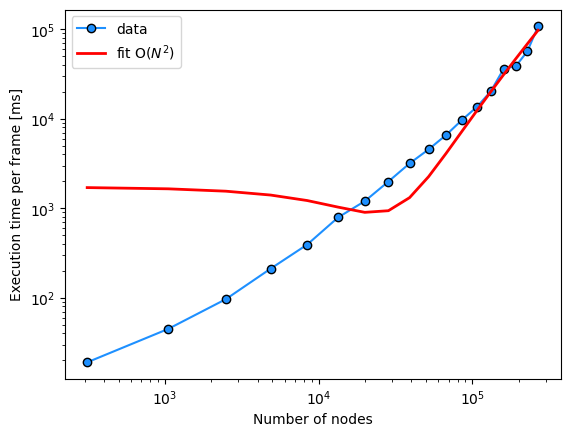

In [15]:
plt.loglog(x, y, 'o-', mec='k', mfc='dodgerblue', color='dodgerblue', label='data')
plt.loglog(x, model_quad(x, m.values['a'], m.values['b'], m.values['c']), lw=2, color='red', label=fr'fit O($N^2$)')
plt.xlabel('Number of nodes')
plt.ylabel('Execution time per frame [ms]')
plt.legend()
plt.show()

In [16]:
cost = LeastSquares(x, y, np.ones_like(y), model)
m1 = Minuit(cost, a=1e-5, b=2)
# m.limits['a'] = (None, None)
# m.limits['b'] = (2, 2)
m1.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 3.274e+08 (χ²/ndof = 20465540.8)│              Nfcn = 426              │
│ EDM = 8.3e+05 (Goal: 0.0002)     │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           ABOVE call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │        Covariance APPROXIMATE        │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │26.9696e-9 │ 0.0032e-9 │            │            │         │         │       │
│ 1 │ b    │ 2.315236  │ 0.000009  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────────────────┐
│   │              a              b │
├───┼───────────────────────────────┤
│ a │       1.02e-23 -28.472450e-18 │
│ b │ -28.472450e-18       8.05e-11 │
└───┴───────────────────────────────┘

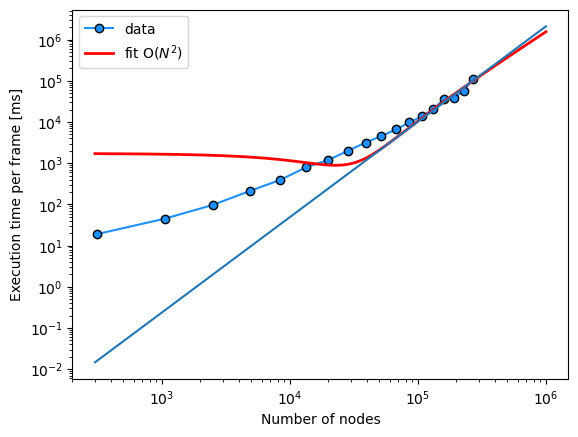

In [17]:
dummy_x = np.arange(300, 1e6, 20)
plt.loglog(x, y, 'o-', mec='k', mfc='dodgerblue', color='dodgerblue', label='data')
plt.loglog(dummy_x, model_quad(dummy_x, m.values['a'], m.values['b'], m.values['c']), lw=2, color='red', label=fr'fit O($N^2$)')
plt.loglog(dummy_x, model(dummy_x, m1.values['a'], m1.values['b']))
plt.xlabel('Number of nodes')
plt.ylabel('Execution time per frame [ms]')
plt.legend()
plt.show()

In [18]:
cost = LeastSquares(x, y, np.ones_like(y), model2)
m2 = Minuit(cost, a=1)
# m.limits['a'] = (None, None)
# m.limits['b'] = (2, 2)
m2.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 2.144e+09 (χ²/ndof = 126105621.2)│              Nfcn = 15               │
│ EDM = 8.99e-09 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │21.84017e-3│0.00017e-3 │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬──────────┐
│   │        a │
├───┼──────────┤
│ a │ 2.93e-14 │
└───┴──────────┘